## Упражнение C1

Задача 1: Решение неравенства
Точные корни: [-3/((-1/2 - sqrt(3)*I/2)*(27/2 + 27*sqrt(3)*I/2)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(27/2 + 27*sqrt(3)*I/2)**(1/3)/3, -(-1/2 + sqrt(3)*I/2)*(27/2 + 27*sqrt(3)*I/2)**(1/3)/3 - 3/((-1/2 + sqrt(3)*I/2)*(27/2 + 27*sqrt(3)*I/2)**(1/3)), -(27/2 + 27*sqrt(3)*I/2)**(1/3)/3 - 3/(27/2 + 27*sqrt(3)*I/2)**(1/3)]
Приближённые корни: [-1.87938524  0.34729635  1.53208889]


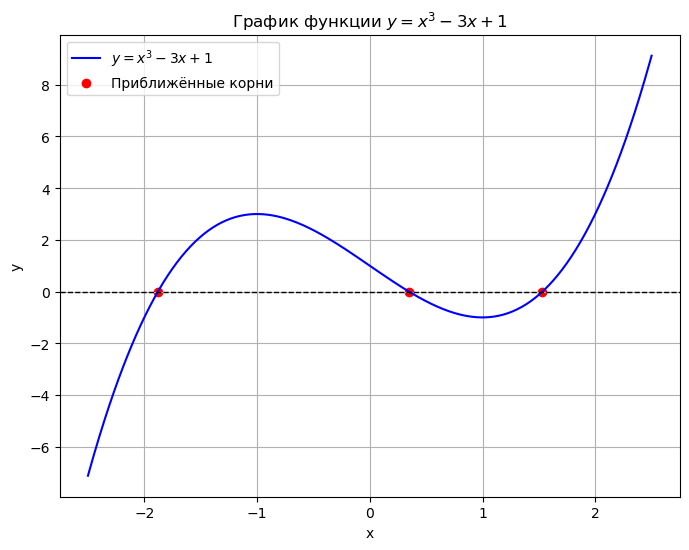

In [30]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Задача 1: Решение неравенства x^3 - 3x + 1 > 0

# Символьное решение
x = sp.Symbol('x', real=True)
expr = x**3 - 3*x + 1
roots = sp.solve(expr, x)  # Точные корни уравнения

# Приближённое решение
def cubic_function(x):
    return x**3 - 3*x + 1

# Используем fsolve для поиска корней
approx_roots = fsolve(cubic_function, [-2, 0, 2])  # Начальные приближения для корней

# Результаты для задачи 1
print("Задача 1: Решение неравенства")
print("Точные корни:", roots)
print("Приближённые корни:", approx_roots)

# График для иллюстрации
x_vals = np.linspace(-2.5, 2.5, 500)
y_vals = cubic_function(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, y_vals, label=r"$y = x^3 - 3x + 1$", color="blue")
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.scatter(approx_roots, [0, 0, 0], color="red", label="Приближённые корни")
plt.title("График функции $y = x^3 - 3x + 1$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.legend()
plt.show()

## Упражнение C2


Задача 2: Таблица результатов
eps       a         b         c         
0.01      201       1         4         
0.001     2001      1         12        


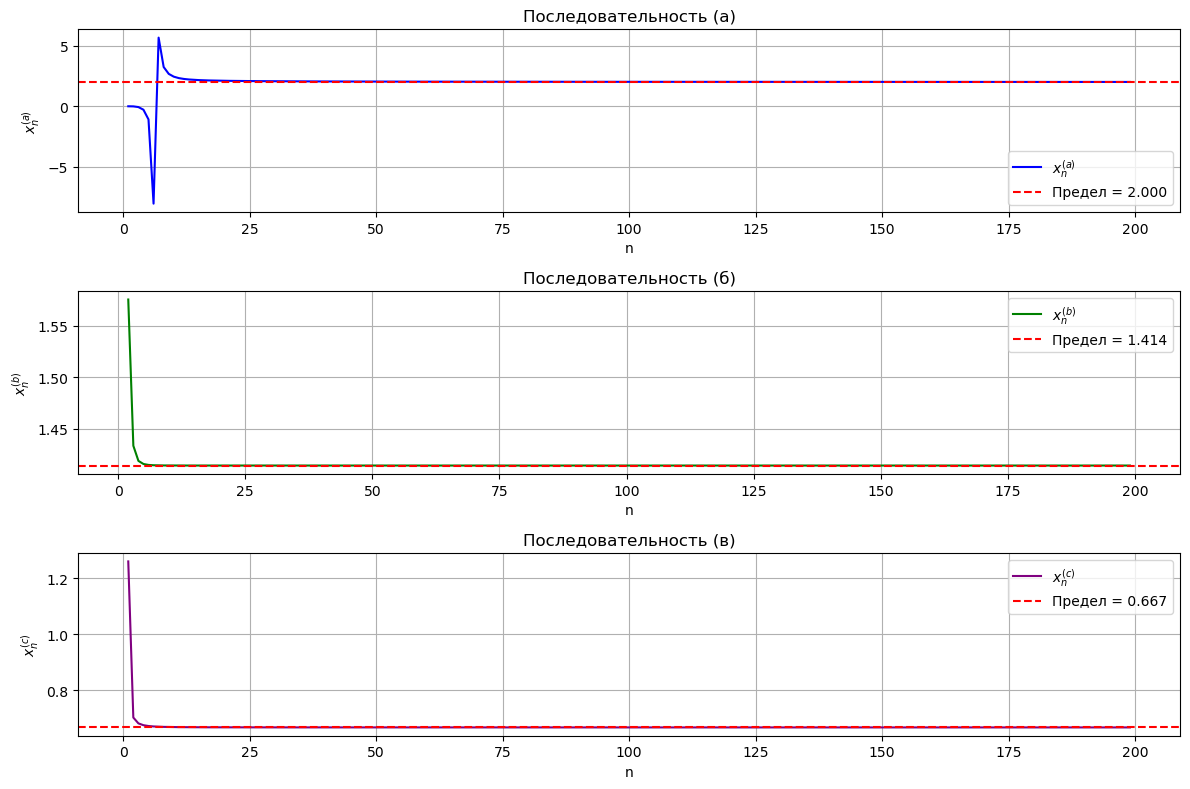

In [10]:
# Задача 2: Исследование последовательностей {x_n}
import warnings
warnings.filterwarnings('ignore')

# Функции последовательностей
def seq_a(n):
    return (2 * n**5 + 2 * n**4 + 3) / (n**5 - 5 * n - 10000)

def seq_b(n):
    return np.sqrt(2 * n**5 + 3) / np.sqrt(n**5 - 5)

def seq_c(n):
    return np.cbrt(n**3 + n**2) - np.cbrt(n**3 - n**2)

# Пределы последовательностей при n -> ∞
lim_a = sp.limit((2 * x**5 + 2 * x**4 + 3) / (x**5 - 5 * x - 10000), x, sp.oo)
lim_b = sp.limit(sp.sqrt(2 * x**5 + 3) / sp.sqrt(x**5 - 5), x, sp.oo)
lim_c = sp.limit(sp.cbrt(x**3 + x**2) - sp.cbrt(x**3 - x**2), x, sp.oo)

# Преобразуем в числа для анализа
a_val = float(lim_a)
b_val = float(lim_b)
c_val = float(lim_c)

# Функция для вычисления n_0(eps)
def find_n0(sequence, limit, eps):
    n = 1
    while abs(sequence(n) - limit) >= eps:
        n += 1
    return n

# Вычисляем n_0(0.01) и n_0(0.001)
n0_001_a = find_n0(seq_a, a_val, 0.001)
n0_001_b = find_n0(seq_b, b_val, 0.001)
n0_001_c = find_n0(seq_c, c_val, 0.001)

n0_01_a = find_n0(seq_a, a_val, 0.01)
n0_01_b = find_n0(seq_b, b_val, 0.01)
n0_01_c = find_n0(seq_c, c_val, 0.01)

# Таблица результатов
print("\nЗадача 2: Таблица результатов")
print(f"{'eps':<10}{'a':<10}{'b':<10}{'c':<10}")
print(f"{'0.01':<10}{n0_01_a:<10}{n0_01_b:<10}{n0_01_c:<10}")
print(f"{'0.001':<10}{n0_001_a:<10}{n0_001_b:<10}{n0_001_c:<10}")

# -----------------------------------------------
# Графическая иллюстрация
n_vals = np.arange(1, 200)

plt.figure(figsize=(12, 8))

# График для последовательности (а)
plt.subplot(3, 1, 1)
plt.plot(n_vals, seq_a(n_vals), label=r"$x_n^{(a)}$", color="blue")
plt.axhline(a_val, color="red", linestyle="--", label=f"Предел = {a_val:.3f}")
plt.title("Последовательность (а)")
plt.xlabel("n")
plt.ylabel(r"$x_n^{(a)}$")
plt.grid(True)
plt.legend()

# График для последовательности (б)
plt.subplot(3, 1, 2)
plt.plot(n_vals, seq_b(n_vals), label=r"$x_n^{(b)}$", color="green")
plt.axhline(b_val, color="red", linestyle="--", label=f"Предел = {b_val:.3f}")
plt.title("Последовательность (б)")
plt.xlabel("n")
plt.ylabel(r"$x_n^{(b)}$")
plt.grid(True)
plt.legend()

# График для последовательности (в)
plt.subplot(3, 1, 3)
plt.plot(n_vals, seq_c(n_vals), label=r"$x_n^{(c)}$", color="purple")
plt.axhline(c_val, color="red", linestyle="--", label=f"Предел = {c_val:.3f}")
plt.title("Последовательность (в)")
plt.xlabel("n")
plt.ylabel(r"$x_n^{(c)}$")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()